<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Testing the number of constituents
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [1]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
import scipy.signal as signal
import datetime as dt
import hvec_tide.analysers as tide

In [2]:
# Settings
plt.rcParams['axes.grid'] = True

#### Connect database and import data

In [3]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'RWS_data.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [4]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,RWS_Waterinfo,RWS_Waterinfo,2,"CREATE TABLE ""RWS_Waterinfo"" (\n""level_0"" INTE..."
1,table,Logboek_databeheer,Logboek_databeheer,3,"CREATE TABLE ""Logboek_databeheer"" (\n""Date"" DA..."
2,index,ix_RWS_Waterinfo_level_0,RWS_Waterinfo,4,"CREATE INDEX ""ix_RWS_Waterinfo_level_0""ON ""RWS..."


In [5]:
sql = (
    "SELECT naam, tijd, waarde/100 AS h FROM RWS_Waterinfo "
    "WHERE naam LIKE 'Delfzijl' "
)
df = pd.read_sql(sql, cnxn)

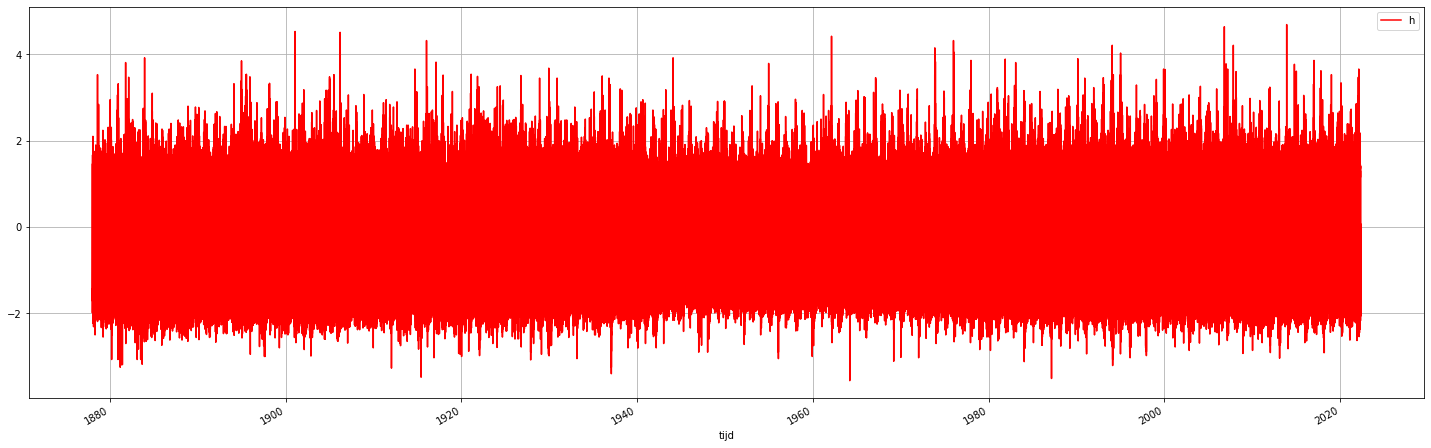

In [6]:
df.plot(x = 'tijd', y = 'h', figsize = (25, 8), color = 'r');

In [12]:
sol = tide.analyse_long_series(
    df, 
    col_datetime = 'tijd', col_h = 'h', 
    lat = 52,
    nodal = False,
    trend = False,
    method = 'ls',
    conf_int = 'none',
    constit= {'M2', 'S2'}, create_time_series = False, include_phase = False)

100%|██████████| 145/145 [00:04<00:00, 31.88it/s]


In [13]:
sol

,,,z0,M2_ampl,S2_ampl,M2_phase,S2_phase,zmean
tijd,naam,,,,,,,
1878-12-31,Delfzijl,0,-0.261940,1.439393,0.160856,101.384776,55.209000,-0.227556
1879-12-31,Delfzijl,0,-0.221741,1.362960,0.289231,68.144496,20.039549,-0.205129
1880-12-31,Delfzijl,0,-0.193651,1.354436,0.311032,66.127672,18.993685,-0.151690
1881-12-31,Delfzijl,0,-0.222375,1.375892,0.273426,66.790304,21.214183,-0.200764
1882-12-31,Delfzijl,0,-0.198822,1.404170,0.309095,64.868253,20.411342,-0.172632
...,...,...,...,...,...,...,...,...
2018-12-31,Delfzijl,0,0.107250,1.360591,0.323408,57.503243,14.504595,0.105132
2019-12-31,Delfzijl,0,0.182383,1.321293,0.328561,58.344641,14.968184,0.195219
2020-12-31,Delfzijl,0,0.189843,1.332276,0.308265,56.918328,14.490744,0.205460


In [9]:
sol.reset_index(inplace = True)
t = sol['tijd'].dt.year
res = pd.DataFrame()
res['t'] = t
res['M2_S2'] = sol['z0']

In [10]:
{'K1', 'K2', 'M2', 'N2', 'O1', 'P1', 'S2'}

{'K1', 'K2', 'M2', 'N2', 'O1', 'P1', 'S2'}

In [11]:
sol = tide.analyse_long_series(
    df, 
    col_datetime = 'tijd', col_h = 'h', 
    lat = 52,
    nodal = False,
    trend = False,
    method = 'robust',
    conf_int = 'none',
    constit= {'K1', 'K2', 'M2', 'N2', 'O1', 'P1', 'S2'}, create_time_series = False)

100%|██████████| 145/145 [00:09<00:00, 15.84it/s]


#### End script
Prepared by HVEC lab, 2022